# **WHAT MAKES IT A HIT SONG: SPOTIFY TOP 50 SONG ANALYSIS**

The *goal of this analysis* is to uncover the common characteristics shared by songs that make it into Spotify’s Top 50 most-streamed list.

To explore this, a *dataset of 50 popular tracks* was examined using built-in pandas functions. Each song includes several audio features, such as danceability, acousticness, energy, and duration, among others.

*Insights are guided by a series of analytical questions*. Each question appears above the relevant code block, followed by insights generated from the data.

---


☝ NOTE: Prior to reading the below, click **Run all** at the top of the page.

# Dataset: Import, Overview, and Cleaning

In this part, I import the available dataset and run some built-in pandas functions to summarize the data and understand:
- what values I have available and of which data type,
- if there are any duplicates and/or missing values,
- what are the outliers.



In the code block below I have imported kagglehub, pandas and os library to be able to read the dataset from a csv file available on Kaggle.

In [73]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("atillacolak/top-50-spotify-tracks-2020")

csv_path = os.path.join(path, 'spotifytoptracks.csv')

df = pd.read_csv(csv_path)

print("Dataset loaded successfully!")


Dataset loaded successfully!


After successfully importing the dataset, I have run the *df.head()* to see the first five lines of the dataset and identify what features are available. I have also dropped the *Unnamed:0* as it is repeating the auto-generated index and was not defined in the dataset description.

In [78]:
df = df.drop(columns=['Unnamed: 0'])

In [79]:
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


For further analysis purpose, here are the **definitions of each available metrics**:
- *Energy*: A measure of intensity and activity—high energy often means fast, loud, and dynamic.
- *Danceability*: How suitable a track is for dancing, based on tempo, rhythm stability, beat strength, and style.
- *Key*: The musical key of the track, represented as integers 0–11 corresponding to pitch classes.
- *Loudness*: The average volume of the song in decibels; louder tracks have higher values (less negative).
-Acousticness: The likelihood that a track is acoustic—higher values mean more acoustic sound.
- *Speechiness*: Detects the presence of spoken words; high values suggest speech-like content (like podcasts or rap).
- *Instrumentalness*: Predicts whether a track contains vocals—closer to 1 means more instrumental.
- *Liveness*: Estimates the presence of an audience or live performance elements.
- *Valence*: Describes the musical “positivity” or emotional tone—high valence sounds more cheerful.
- *Tempo*: The speed or pace of the track in beats per minute (BPM).
- *Duration_ms*: The track’s total length measured in milliseconds.
- *Genre*: The category or style of music, like Pop, Hip-Hop/Rap, or Dance/Electronic.

This is a small dataset, however I have doublechecked if there are duplicated rows within it. Running the code block below will return no values, which means that all rows are unique.

In [49]:
df[df.duplicated()]

,Rank,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre


To explore dataset further, I have used *describe* function to get summary on the central tendency, spread and shape of the dataset's distribution.

Running this code helped me to:
- Confirm that all columns have 50 values (count)
- Identify *mean* and standard deviation of each feature
- Find the minimum and maximum values of each feature
- Get a sense of how the data is distributed (percentiles)





In [80]:
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


Some interesting insights from the table above that could be used to define what makes is a hit song:

- **Danceability**: Ranges from 0.225 to 0.935, with a mean around 0.717. *Most tracks are quite danceable—fitting* for a Top 50 hits list.

- **Loudness**: Goes from about −7.55 dB (Q1) to −4.28 dB (Q3), hinting that *louder tracks dominate the upper end*.

- **Energy & Valence**: Mean energy is 0.61 and valence (positivity) is 0.56. So *most songs have moderate drive and emotional tone*, no necessity for a hit song the be high-energy or happy.

- **Instrumentalness**: Median is 0.0, and even the 75% percentile is basically 0—confirming that most *Top 50 tracks are vocal-heavy*.

- **Acousticness**: Big spread from 0.001 to 0.934. Most tracks are electronically produced, only *a few are highly acoustic*.

- **Duration**: Songs typically range from 175k to 215k ms (*about 2:55 to 3:35*), which feels about right for *radio-friendly hits*.

In [51]:
df.isnull().sum()

,0
Rank,0
artist,0
album,0
track_name,0
track_id,0
energy,0
danceability,0
key,0
loudness,0
acousticness,0


In [52]:
numeric_cols = ['energy', 'danceability', 'loudness', 'acousticness',
                'speechiness', 'instrumentalness', 'liveness', 'valence',
                'tempo', 'duration_ms']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\nOutliers in {col}:\n", outliers[['artist', 'track_name', col]])



Outliers in energy:
 Empty DataFrame
Columns: [artist, track_name, energy]
Index: []

Outliers in danceability:
            artist                                      track_name  \
16  Lewis Capaldi                                   Before You Go   
44  Billie Eilish                            lovely (with Khalid)   
47        JP Saxe  If the World Was Ending - feat. Julia Michaels   

    danceability  
16         0.459  
44         0.351  
47         0.464  

Outliers in loudness:
            artist           track_name  loudness
24  Billie Eilish  everything i wanted   -14.454

Outliers in acousticness:
            artist                                      track_name  \
1     Tones And I                                    Dance Monkey   
7           Powfu                death bed (coffee for your head)   
9   Lewis Capaldi                               Someone You Loved   
18       Maroon 5                                        Memories   
24  Billie Eilish                     

**Outlier Summary and Insights**

- No outliers in Energy, Valence, and Tempo.
- 3 track with lower Danceability.
- 1 track with much lower Loudness that the other.
- 7 tracks with more Acoustic sounds compared to the rest.
- 6 tracks with more Speech-like content.
- 2 tracks with high Instrumentalness and 10 with very low instrumentalness.
- 3 track with more Live performance elements.
- 2 tracks with unusually long Duration.

I am not removing the outliers in further analysis. And here are some insights that might help determining hit-like song qualities:
- Songs that are made for dancing, are louder, and less instrumental are more likely to make it to the TOP50.
- Hit songs are usually of radio-friendly duration.
- Finding a good balance of acousticness and speech-like content might be important.
- Songs that are not too slow or fast, and not too cheerful or sad seem to become more popular.


# Exploratory Data Analysis
In this part I have looked for **answers to the questions provided by a Product Manager**. Like in the section above, text box with a question is followed by a code box and insights relevant to reach the goal of this analysis.

***1. How many observations and features are there in the dataset?***

  The quickest way of answering this question could be using the *shape* property. Running the code below will give the result of (50,17) which means that there are 50 observations, a.k.a. rows, and 17 features, a.k.a. columns, in the dataset.

  It is important to note that the first column is the index, so there are 16 features (information about a track) in this dataset.

In [81]:
df.shape

(50, 16)

***2. Which of the features are categorical and which are numeric?***

To answer this question I have used the *dtypes* property which returns data type description of each column. By running the code below you will see that:

- Rank, energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, and duration_ms are ***numerical***. Also, rank, key, and duration_ms are integers and the rest are floats.
- Artist, album, track_name, track_id, and genre are ***categorical*** data.

In [82]:
df.dtypes

,0
artist,object
album,object
track_name,object
track_id,object
energy,float64
danceability,float64
key,int64
loudness,float64
acousticness,float64
speechiness,float64


***3. How many artists have their songs in the top 50 in total?***

To answer this question, I used the *nunique* function, which counts the number of unique values in the specified column.

By running the code below you will see that there are **40 artists** who have their songs in TOP50 list.

In [83]:
df['artist'].nunique()

40

***4. Are there any artists that have more than 1 popular track? If yes, which and how many?***

To find whether some of artist have more than one track in the TOP50 I have used *value_counts* function. By runinng the code below you will see that there are **7 artists** who have more than 1 song in the list.



---


***5. Who was the most popular artist?***

There are 3 (**Dua Lipa, Billie Eilish, Travis Scott**) artists with 3 songs each in the TOP50. For further analysis, it would be good to look at the average rank of their songs.

In [85]:
artist_counts = df['artist'].value_counts()
multi_track_artists = artist_counts[artist_counts > 1]
print(multi_track_artists)

artist
Dua Lipa         3
Billie Eilish    3
Travis Scott     3
Harry Styles     2
Lewis Capaldi    2
Justin Bieber    2
Post Malone      2
Name: count, dtype: int64


***6. How many albums in total have their songs in the TOP50?***

Same a with unique artists, I have use the *nunique* function for the album column. There are **45 albums** in the top.

In [57]:
df['album'].nunique()

45

***7. Are there any albums that have more than 1 popular track? If yes, which and how many?***

The below code summarizes which albums have more than 1 track in the TOP50 as well as displays the average rank. **Dua Lipa's "Future Nostalgia"** has 3 songs in the top.



In [86]:
album_counts = df['album'].value_counts()
multi_track_albums = album_counts[album_counts > 1]
print(multi_track_albums)

album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64


***8. Which tracks have a danceability score above 0.7 and which below 0.4?***

To answer this question, I simply used conditions (>0.7 and <0.4) to filter the tracks and print the list.

Running the two code blocks below, you will see that 31 track has danceability score above 0.7. This is **62%** of all songs in the TOP50. Only one track had danceability below 0.4. This data also confirms previous insights (in the Outliers part) that songs that have **higher danceability are more likely to make it to the top**.

In [59]:
print(df[df['danceability'] > 0.7]['track_name'])

1                                      Dance Monkey
2                                           The Box
3                             Roses - Imanbek Remix
4                                   Don't Start Now
5                      ROCKSTAR (feat. Roddy Ricch)
7                  death bed (coffee for your head)
8                                           Falling
10                                             Tusa
13                                  Blueberry Faygo
14                         Intentions (feat. Quavo)
15                                     Toosie Slide
17                                           Say So
18                                         Memories
19                       Life Is Good (feat. Drake)
20                 Savage Love (Laxed - Siren Beat)
22                                      Breaking Me
24                              everything i wanted
25                                         Señorita
26                                          bad guy
27          

In [60]:
print(df[df['danceability'] < 0.4]['track_name'])

44    lovely (with Khalid)
Name: track_name, dtype: object


***9. Which tracks have their loudness above -5 and which below -8?***

Similarly to danceability, I have used conditions based on the loudness metric to answer this question.

By running the two code blocks below you will see that:

- 19 tracks have loudness levels above -5 dB, indicating higher overall volume;
- 9 tracks fall below -8 dB, making them noticeably quieter.

The average loudness across all tracks is -6.23 dB. Interestingly, 38% of the Top 50 tracks are louder than average, suggesting that **higher loudness might play a role in boosting a song’s chart success**.


In [61]:
print(df[df['loudness'] > -5]['track_name'])

4                                   Don't Start Now
6                                  Watermelon Sugar
10                                             Tusa
12                                          Circles
16                                    Before You Go
17                                           Say So
21                                        Adore You
23                           Mood (feat. iann dior)
31                                   Break My Heart
32                                         Dynamite
33                 Supalonely (feat. Gus Dapperton)
35                  Rain On Me (with Ariana Grande)
37    Sunflower - Spider-Man: Into the Spider-Verse
38                                            Hawái
39                                          Ride It
40                                       goosebumps
43                                          Safaera
48                                         Physical
49                                       SICKO MODE
Name: track_

In [62]:
print(df[df['loudness'] < -8]['track_name'])

7                   death bed (coffee for your head)
8                                            Falling
15                                      Toosie Slide
20                  Savage Love (Laxed - Siren Beat)
24                               everything i wanted
26                                           bad guy
36                               HIGHEST IN THE ROOM
44                              lovely (with Khalid)
47    If the World Was Ending - feat. Julia Michaels
Name: track_name, dtype: object


***10. Which track is the longest and which is the shortest?***

To find answer to this question, I have used the *idxmax* and *idxmin* functions for duration_ms metric.

The mean of track duration is around  3 minutes and 19 seconds; songs typically range from 175k to 215k ms (about 2:55 to 3:35) - a sweet spot for radio play. **The longest track is "SICKO MODE" by Travis Scott**, clocking in at over 5 minutes, while **the shortest is "Mood (feat. iann dior)" by 24kGoldn**, running about 2 minutes and 20 seconds.

While the shortest one isn't unusually short, the longest one is definitely not something you typically see on the Top 50 list.

In [91]:
df['duration_min'] = df['duration_ms'].apply(
    lambda x: f"{int(x // 60000)}:{int((x % 60000) // 1000):02d}"
)
df.loc[df['duration_min'].idxmax(), ['artist', 'track_name', 'duration_min']]



,49
artist,Travis Scott
track_name,SICKO MODE
duration_min,5:12


In [92]:
df['duration_min'] = df['duration_ms'].apply(
    lambda x: f"{int(x // 60000)}:{int((x % 60000) // 1000):02d}"
)
df.loc[df['duration_min'].idxmin(), ['artist', 'track_name', 'duration_min']]

,23
artist,24kGoldn
track_name,Mood (feat. iann dior)
duration_min,2:20


The following 3 code blocks allowed me to answer these questions:

***11. How many genres in total are represented in the TOP50?***

Using the *nunique* function I have identified that tracks belong to either of **16 genres**.

---

***12. Which genre is the most popular?***

Using the *value_counts *function I was able to count how many songs each genre has in the TOP50 and filtered out the genre with most songs using the *idxmax* function.

The most popular genre is **POP**!

---

***13. Which genres have just one song in the TOP50?***

By reusing the value_counts for previous question, I have identified that **10 **out of 16 genre have only one track in the TOP50 list. **These are the genres: chamber pop, alternative/reggaeton/experimental, dreampop/Hip-Hop/R&B, disco-pop, dance-pop/disco, hip-hop/trap, nu-disco, pop rap, pop/soft rock, r&b/hip-hop alternative**.

*Interesting to note that a lot of these are sub-genre of pop.*



In [65]:
df['genre'].nunique()

16

In [66]:
most_popular_genre = df.value_counts('genre')
print(most_popular_genre.idxmax())

Pop


In [67]:
print(most_popular_genre[most_popular_genre == 1])

genre
Chamber pop                           1
Alternative/reggaeton/experimental    1
Dreampop/Hip-Hop/R&B                  1
Disco-pop                             1
Dance-pop/Disco                       1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
Name: count, dtype: int64


***14. How does danceability / loudness / acoustics score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?***

To compare different genre based on the listed metrics, I have found the *means* and looked for insights considering them:

- *Danceability*: Hip-Hop/Rap (0.77) and Dance/Electronic (0.76) are more rhythm-driven and well-suited for movement. Pop (0.68) and Alternative/Indie (0.66) are still danceable, but typically lean more on melody or lyrics than pure groove.

- *Loudness*: Dance/Electronic and Alternative/Indie are generally louder (closer to 0 dB = louder). Hip-Hop/Rap is the softest on average, while Pop sits in the middle, balanced between punch and subtlety.

- *Acousticness*: Alternative/Indie (0.58) is the most organic-sounding, often using real instruments or stripped-down arrangements. Dance/Electronic (0.10) is the least acoustic—heavily synthesized and production-heavy. Pop music tends to strike a middle ground when it comes to acousticness. With an average value of 0.32, it suggests that while pop incorporates some organic elements like guitars or piano, it's still largely shaped by digital production and synthetic textures.

Overall, balance helps **pop music stay versatile—capable** of leaning more acoustic for emotional ballads or more electronic and loud for dance hits, depending on the mood it's aiming to deliver. It's the genre's adaptability that keeps it so mainstream and ever-evolving.


In [87]:
# Danceability
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
danceability_comparison = df[df['genre'].isin(selected_genres)].groupby('genre')['danceability'].mean().sort_values(ascending=False)
print('Danceability comparison:\n', danceability_comparison,'\n')

# Loudness
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
loudness_comparison = df[df['genre'].isin(selected_genres)].groupby('genre')['loudness'].mean().sort_values(ascending=False)
print('Loudness comparison:\n',loudness_comparison,'\n')

# Acoustics
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
acoustics_comparison = df[df['genre'].isin(selected_genres)].groupby('genre')['acousticness'].mean().sort_values(ascending=False)
print('Acoustics comparison:\n',acoustics_comparison,'\n')

Danceability comparison:
 genre
Hip-Hop/Rap          0.765538
Dance/Electronic     0.755000
Pop                  0.677571
Alternative/Indie    0.661750
Name: danceability, dtype: float64 

Loudness comparison:
 genre
Dance/Electronic    -5.338000
Alternative/Indie   -5.421000
Pop                 -6.460357
Hip-Hop/Rap         -6.917846
Name: loudness, dtype: float64 

Acoustics comparison:
 genre
Alternative/Indie    0.583500
Pop                  0.323843
Hip-Hop/Rap          0.188741
Dance/Electronic     0.099440
Name: acousticness, dtype: float64 



***15. Which features are strongly positively correlated / strongly negatively correlated / not correlated?***

To answer this question, I first used the *corr* function from pandas to calculate the correlation matrix. However, since the output was difficult to interpret, I opted for a visualization approach. By importing the *seaborn* and matplotlib *libraries*, I was able to create a heatmap to better understand the correlations (see code block below).

Red indicates strong positive correlation, whereas blue indicates strong negative correlation. No correlation is identified by grey-ish shades.
---
- **Energy has a very strong positive correlation with loudness** (0.79), meaning louder tracks tend to feel more energetic. **It also has a strong negative correlation with acousticness** (-0.68), so energetic songs are usually less acoustic and more electronically produced.

- **Danceability shows a moderate positive correlation with valence** (0.48), suggesting that more danceable songs often feel happier or more emotionally upbeat.
---
- **Loudness is negatively correlated with acousticness** (-0.50), reinforcing that louder songs are less likely to be acoustic-driven.

- **Instrumentalness is negatively correlated with loudness** as well (-0.55), meaning louder tracks typically feature more vocals.

- **Acousticness and valence also share a slight negative relationship** (-0.24), hinting that more acoustic tracks lean slightly more melancholic or subdued.

---

- **Speechiness vs. Tempo have no clear relationship**, artists feel free to speak rhythmically in slow ballads or drop rapid verses over fast beats.
- **Valence vs. Instrumentalness have very low (-0.2) correlation**. A song can feel joyful whether it has vocals or is fully instrumental—there’s no emotional rulebook tied to lyrics.
- **Duration has very low correlation with the rest of features**, except for speechiness, which is a bit higher.
- **Liveness as well has mostly low correlation with the rest of features**,except for key.


---

The heatmap reveals several strong and meaningful relationships between musical features—most notably, energy and loudness are tightly linked, as louder songs tend to feel more intense and dynamic. At the same time, energetic and loud tracks are generally less acoustic and less instrumental, highlighting a preference for bold, digitally produced pop sounds. Danceable songs tend to feel happier, reflected in the moderate correlation between danceability and valence. On the flip side, features like speechiness, duration, and liveness show little to no correlation with most others, signaling creative flexibility. These low correlations suggest that tracks can blend spoken word, length, or live feel with a variety of other traits—underscoring the diverse stylistic approaches within the dataset.


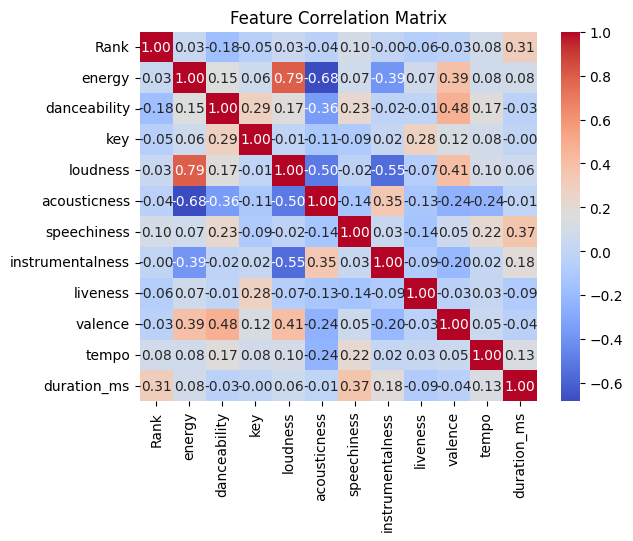

In [69]:
correlation_matrix = df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Summary and Insights
Based on the analysis, it appears that songs reaching the Top 50 tend to strike a careful balance between a few key musical qualities. <read more>



- Most hits are around 3 minutes and 20 seconds long—a **duration that is short enough for radio play** while still delivering a complete musical message.
- High danceability scores, with over 60% of tracks boasting values above 0.7, indicate that an **infectious rhythm is crucial**, while a relatively high energy level paired with greater loudness creates a dynamic and engaging listening experience.
- In contrast, these songs typically have lower acousticness and instrumentalness, suggesting that **a polished, digitally produced sound rather than an organic or stripped-down arrangement is preferred**.
- Additionally, while some features like speechiness, duration, and liveness show little to no linear relationship with other attributes, this independence allows for **creative variation, meaning that a strong hook or an innovative production can compensate for less typical traits**.
- Finally, genre analysis points to pop and its related subgenres as dominant, reinforcing the idea that **cross-genre appeal combined with modern production values** helps shape a Top 50 hit.

# Suggestions for Further Analysis

To define what features makes a track popular, the following further steps could be taken.

- **Larger dataset**, for example TOP50 songs for the past 10 years. That would allow to identify whether music trends have impact or popularity is based on the characteristics analyzed in this report.
- Also, **additional metrics**, such as play count, playlist appearances, country-level data, release date, demographic data of listeners, listener retention over time, etc.
- **Sentiment analysis of lyrics** could offer insight into the emotional tone of popular songs—do upbeat lyrics correlate with higher ranks, or are sad songs just as likely to chart?
- **Release strategy factors**: Add variables like release day, whether the song had a music video at launch, or social media buzz—these contextual features might play a role in a track’s popularity beyond its audio profile.
- **Artist-level profiling**: Build artist “fingerprints” using averaged or aggregated audio features—this could help spot consistency in style or successful experimentation across their hits.